In [12]:
from glob import glob
from os import path
from pandas import read_csv, concat
from csv import writer



In [13]:
#load data
folder_path = './csv/Angular_swing30/'

#파일 형식: s1_gyr.csv
swing_files = glob(path.join(folder_path, 's*_gyr.csv'))

df_swing = concat((read_csv(f,header=0) for f in swing_files),ignore_index=True)
df_swing.fillna(0, inplace=True)

#load data
folder_path = './csv/Angular_perting30/'

#파일 형식: s1_gyr.csv
perting_files2 = glob(path.join(folder_path, 'p*_gyr.csv'))

df_perting = concat((read_csv(f,header=0) for f in perting_files2),ignore_index=True)
df_perting.fillna(0, inplace=True)

df_swing.fillna(0, inplace=True)
df_perting.fillna(0, inplace=True)

In [15]:
print(df_swing.shape)
print(df_perting.shape)

(4485, 4)
(2809, 4)


In [18]:
df_swing.head(),df_perting.head()

(       time     X_value       Y_value   Z_value
 0  Started:  8월 21 2019  10:32:44:533          
 1    0.0000     0.00000       0.00000   0.00000
 2    0.0005    -0.61352       0.40110  -0.80188
 3    0.0327    -0.47874       0.34446  -0.62287
 4    0.0663    -0.36801       0.30112  -0.48450,
        time     X_value       Y_value  Z_value
 0  Started:  8월 21 2019  11:12:12:974         
 1    0.0000     0.00000       0.00000  0.00000
 2    0.0005    -0.08245       0.10290  0.03318
 3    0.0318    -0.08241       0.08221  0.01994
 4    0.0659    -0.07358       0.06220  0.01002)

In [19]:
df_swing.info(),df_perting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 4 columns):
time       4485 non-null object
X_value    4485 non-null object
Y_value    4485 non-null object
Z_value    4485 non-null object
dtypes: object(4)
memory usage: 140.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 4 columns):
time       2809 non-null object
X_value    2809 non-null object
Y_value    2809 non-null object
Z_value    2809 non-null object
dtypes: object(4)
memory usage: 87.9+ KB


(None, None)

In [20]:
import numpy as np
import matplotlib as plt

timestamp = np.linspace(0,6,30)
timestamp

array([0.        , 0.20689655, 0.4137931 , 0.62068966, 0.82758621,
       1.03448276, 1.24137931, 1.44827586, 1.65517241, 1.86206897,
       2.06896552, 2.27586207, 2.48275862, 2.68965517, 2.89655172,
       3.10344828, 3.31034483, 3.51724138, 3.72413793, 3.93103448,
       4.13793103, 4.34482759, 4.55172414, 4.75862069, 4.96551724,
       5.17241379, 5.37931034, 5.5862069 , 5.79310345, 6.        ])

In [22]:
for x in df_swing['time']:
    if x=='Started:':
        print(x)

Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:
Started:


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def resizedataseq(df,):
    Qx = list(df.iloc[:,0])
    Qy = list(df.iloc[:,1])
    Qz = list(df.iloc[:,2])

    seqlen = len(df)
    
    while seqlen != 120:
        mx = np.mean(Qx)
        my = np.mean(Qy)
        mz = np.mean(Qz)

        if seqlen <120:
            Qx.pop(0)
            Qy.pop(0)
            Qz.pop(0)
            Qx.append(mx)
            Qy.append(my)
            Qz.append(mz)
            #행추가
            df.loc[seqlen]=[mx,my,mz]
            seqlen = seqlen+1
        
        
        elif seqlen > 120:
            #행삭제
            df = df.iloc[:121,:]
            seqlen = 120
            break
            
        
    return df

In [4]:
golf_label = "golf"

golf_dataset = []
start = 1
end = 0


for i in range(1,len(df_golf)):
    if i==len(df_golf)-1:
        end = i
        subset = df_golf[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
        
    
    if df_golf['time'][i] == 'Started:':
        end = i-1
        #print(df_golf[start:end][1:].astype(float))
        subset = df_golf[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
        print(df_bat.iloc[start:end,1:])
        #subset= df_bat.iloc[start:end,1:].astype(float)
        #subset = resizedataseq(subset)
        print(subset)
        start = i+1 
    
        
plt.legend(['X','Y','Z'])
plt.title("golf")
        
    
        
        #df = df.drop(i) #float으로 형변환이 불가능한 

NameError: name 'df_golf' is not defined

time       2.210205
X_value   -0.764080
Y_value   -0.411583
Z_value    0.218299
dtype: float64
(132, 3)
time       2.762974
X_value   -0.049198
Y_value   -0.093730
Z_value    0.526940
dtype: float64
(165, 3)
time       2.922843
X_value   -0.046646
Y_value   -0.154181
Z_value    0.525673
dtype: float64
(174, 3)
time       2.411181
X_value   -0.200817
Y_value   -0.220099
Z_value    0.563386
dtype: float64
(144, 3)
time       2.635203
X_value   -0.037843
Y_value   -0.092549
Z_value    0.476341
dtype: float64
(157, 3)
time       2.634835
X_value   -0.371659
Y_value   -0.522610
Z_value    0.411314
dtype: float64
(157, 3)
time       2.362876
X_value   -0.245888
Y_value   -0.334539
Z_value    0.583759
dtype: float64
(141, 3)
time       2.175592
X_value   -0.503263
Y_value   -0.574959
Z_value    0.699438
dtype: float64
(130, 3)
time       2.290587
X_value   -0.493824
Y_value   -0.437224
Z_value    0.680996
dtype: float64
(137, 3)
time       2.481727
X_value   -0.328251
Y_value   -0.543830
Z_va

Text(0.5, 1, 'bat')

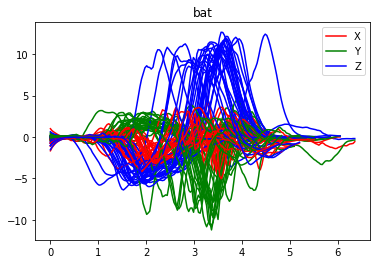

In [31]:

bat_dataset = []
start = 1
end = 0
imname = "tempgr"
fig = plt.figure()

for i in range(1,len(df_swing)):
    if i==len(df_swing)-1:
        end = i
        subset = df_swing[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
            
    
    if df_swing['time'][i] == 'Started:':
        end = i-1
        #print(df_golf[start:end][1:].astype(float))
        subset = df_swing[start:end][1:].astype(float)
        plt.plot(subset['time'],subset['X_value'],color='r')
        plt.plot(subset['time'],subset['Y_value'],color = 'g')
        plt.plot(subset['time'],subset['Z_value'],color='b')
        print(np.mean(subset))
        subset= df_swing.iloc[start:end,1:].astype(float)
        resizedataseq(subset)
        subset = subset.values
        print(subset.shape)
        start = i+1 
        
        fig.savefig(imname+str(i)+".png")
        
plt.legend(['X','Y','Z'])
plt.title("bat")



        

##  주어진 데이터로는 두 스윙간의 차이를 구분하기 어려움.